In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Loading the dataset
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')

print(carseats_df.head())



# A. Data Exploration and Exploration

## 1.1 Explore and visualize the dataset. Look into dataset structure, missing values, summary statistics.

In [26]:
# Data Structure 
print('\n1. BASIC DATASET INFO:')
print(f'Dataset shape: {carseats_df.shape}')
print(f'Dataset rows: {carseats_df.shape[0]}')
print(f'Dataset columns: {carseats_df.shape[1]}')

print('\n2. COLUMN INFORMATION:')
print(carseats_df.info())

print('\n3. DATA TYPES:')
print(carseats_df.dtypes)

# Missing Value 
print('\n4. MISSING VALUES COUNT:')
missing_values = carseats_df.isnull().sum() #look into it
print(missing_values)

# Summary statistics 
print('\n5. SUMMARY STATISTICS:')
carseats_df.describe()


1. BASIC DATASET INFO:
Dataset shape: (400, 11)
Dataset rows: 400
Dataset columns: 11

2. COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None

3. DATA TYPES:
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## 1.2 Create at least 5 histograms, 5 box plots, 5 bar charts, 5 scatterplots using the numerical and categorical input variables and the output variable in your dataset.

## 2. Examine relationships between numerical variables. Identify highly correlated variables with each other and with the target. Discuss whether these variables should be dropped or not, considering the type of models you will use later.

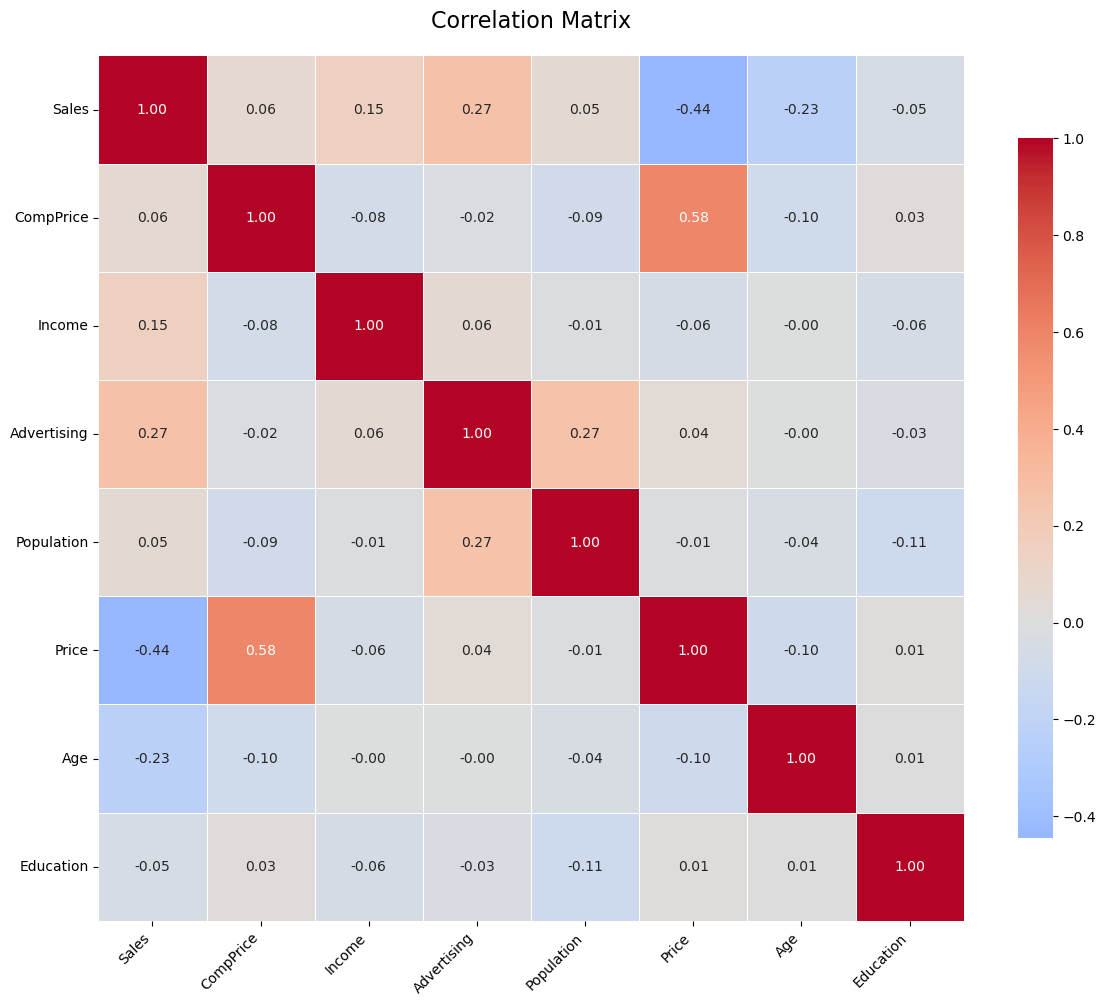

In [16]:
# Remove the unnamed variable
carseats_df = carseats_df.drop('Unnamed: 0', axis=1)

# Calculate the numerical variable correlation matrix for numeric columns only
corr_train = carseats_df.corr(numeric_only=True)

# Plot the correlation matrix with heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_train,  
            annot=True,              
            cmap='coolwarm',         
            fmt='.2f',               
            square=True,             
            cbar_kws={"shrink": .8}, 
            linewidths=0.5,          
            center=0)                
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()

## 3. Convert categorical variables into numeric form using dummy variables.

In [31]:
carseats_df = pd.read_csv('/Users/nicolaswilliams/Desktop/MSCA 681/Datasets-20251004/Carseats.csv')

# Let's one-hot encode our categorical variables
carseats_df = pd.get_dummies(carseats_df, columns=["ShelveLoc", "Urban", "US"], drop_first = True, dtype = 'int')

# With the new dummy variables
print(carseats_df.head(10))


   Unnamed: 0  Sales  CompPrice  Income  Advertising  Population  Price  Age  \
0           1   9.50        138      73           11         276    120   42   
1           2  11.22        111      48           16         260     83   65   
2           3  10.06        113      35           10         269     80   59   
3           4   7.40        117     100            4         466     97   55   
4           5   4.15        141      64            3         340    128   38   
5           6  10.81        124     113           13         501     72   78   
6           7   6.63        115     105            0          45    108   71   
7           8  11.85        136      81           15         425    120   67   
8           9   6.54        132     110            0         108    124   76   
9          10   4.69        132     113            0         131    124   76   

   Education  ShelveLoc_Good  ShelveLoc_Medium  Urban_Yes  US_Yes  
0         17               0                 0     

## 4. Partition the data into a training set (60%), validation set (20%), and test set (20%) (set random_state=42).

In [21]:
from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(carseats_df, test_size=0.6, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.5, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")

Train set: 240
Validation shape: 80
Test shape: 80
